In [1]:
#Include Dependancies
%matplotlib inline       
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

raw = pd.read_csv('insurance.csv')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = raw.select_dtypes(include=numerics)
df = df.drop(axis=1, columns='ResponseNumeric')


nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

#df = clean_dataset(df)
df


Claim Amount  Income  Monthly Premium Auto  Months Since Last Claim  \
0       276.351928   56274                    69                       32   
1       697.953590       0                    94                       13   
2      1288.743165   48767                   108                       18   
3       764.586183       0                   106                       18   
4       281.369258   43836                    73                       12   
...            ...     ...                   ...                      ...   
9129   2340.598798   71941                    73                       18   
9130    309.651122   21604                    79                       14   
9131    816.389043       0                    85                        9   
9132    752.444244   21941                    96                       34   
9133    261.183687       0                    77                        3   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Total Claim Amount  
0                      1          384.811147  
1                      8         1131.464935  
2                      2          566.472247  
3                      7          529.881344  
4                      1          138.130879  
...                  ...                 ...  
9129                   2          198.234764  
9130                   1          379.200000  
9131                   2          790.784983  
9132                   3          691.200000  
9133                   1          369.600000  

[9134 rows x 8 columns]

In [3]:
# Quartile 1 Math
# Select the first quantile

q1 = df['Claim Amount'].quantile(.25)

# Select the third quantile
q3 = df['Claim Amount'].quantile(.75)

print(q1)
print(q3)

399.425179425
896.216704125


In [4]:
# Calculate IQR with Outliers.
iqr = q3-q1

# Upper Bounds
upper = q3 + 1.5*iqr

# Lower Bounds
lower = q1 - 1.5*iqr


# Filter out Outliers
df = df[df['Claim Amount'] > lower]
df = df[df['Claim Amount'] < upper]

In [5]:
# Perform Correlation statics
df.corr()

Claim Amount    Income  Monthly Premium Auto  \
Claim Amount                       1.000000  0.041402              0.458173   
Income                             0.041402  1.000000             -0.027477   
Monthly Premium Auto               0.458173 -0.027477              1.000000   
Months Since Last Claim           -0.008670 -0.031282              0.003352   
Months Since Policy Inception     -0.004105  0.002107              0.015991   
Number of Open Complaints         -0.032600  0.000583             -0.008795   
Number of Policies                 0.242195 -0.010404             -0.026566   
Total Claim Amount                 0.239107 -0.368804              0.607531   

                               Months Since Last Claim  \
Claim Amount                                 -0.008670   
Income                                       -0.031282   
Monthly Premium Auto                          0.003352   
Months Since Last Claim                       1.000000   
Months Since Policy Inception                -0.045241   
Number of Open Complaints                     0.008160   
Number of Policies                            0.010976   
Total Claim Amount                            0.004844   

                               Months Since Policy Inception  \
Claim Amount                                       -0.004105   
Income                                              0.002107   
Monthly Premium Auto                                0.015991   
Months Since Last Claim                            -0.045241   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.000118   
Number of Policies                                 -0.013653   
Total Claim Amount                                 -0.001050   

                               Number of Open Complaints  Number of Policies  \
Claim Amount                                   -0.032600            0.242195   
Income                                          0.000583           -0.010404   
Monthly Premium Auto                           -0.008795           -0.026566   
Months Since Last Claim                         0.008160            0.010976   
Months Since Policy Inception                  -0.000118           -0.013653   
Number of Open Complaints                       1.000000           -0.001115   
Number of Policies                             -0.001115            1.000000   
Total Claim Amount                             -0.007328           -0.010399   

                               Total Claim Amount  
Claim Amount                             0.239107  
Income                                  -0.368804  
Monthly Premium Auto                     0.607531  
Months Since Last Claim                  0.004844  
Months Since Policy Inception           -0.001050  
Number of Open Complaints               -0.007328  
Number of Policies                      -0.010399  
Total Claim Amount                       1.000000

In [6]:
from sklearn.model_selection import train_test_split

# Remove outcome column from data frame
y = df.pop('Claim Amount')
X = df

# Split Dependant data frame into testing Data and Training data, Split outcome
# to testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


print(model.get_params(deep=True))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [8]:
# Building Model, get some coffee this could take a while
# Use Training Data to make the model, Testing to test your model.
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [ 3.84527968e-04  5.14190677e+00 -5.02370031e-01 -1.25812738e-01
 -1.08759911e+01  3.42430897e+01 -5.44231859e-02]
y-axis intercept:  80.94707059531333


In [10]:
X_string = ""
count = 0
for i, coef in enumerate(model.coef_):
    X_string += f"( {round(coef, 3)} X{i} )+\n"
equation = f'Our Equation is y = {model.intercept_} + {X_string}'
print(equation)

Our Equation is y = 80.94707059531333 + ( 0.0 X0 )+
( 5.142 X1 )+
( -0.502 X2 )+
( -0.126 X3 )+
( -10.876 X4 )+
( 34.243 X5 )+
( -0.054 X6 )+



In [11]:
# Test your model
r2=model.score(X_test, y_test)
r2

# Model Score returns an R Squared Value, which roughly means what
# Percentage of the variance is covered by the model.



0.2729592717659455

In [12]:
response = model.predict(X)

print(type(response))
print(response)

<class 'numpy.ndarray'>
[453.97310103 764.83815284 678.85868759 ... 501.65391241 630.66099243
 478.17191557]


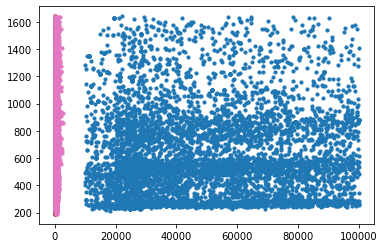

In [13]:
for col in X.columns:
   plt.scatter(X[col], y, s=10)